In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("ScaredCAT.csv")
df = df[df["Suitability Score"] != 0]
df = df.dropna()

#confusion!!!
y = df["Suitability Score"]
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = [0, 1, 2, 3, 4] 
y = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

X = df.drop(columns=["AHP1", "AHP2", "Latitude", "Longitude", "Suitability Score", "vegetation class", "aspect direction"])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)


Iteration 1: Train Acc = 0.9412, Validation Acc = 0.8281, Test Acc = 0.8382
Iteration 2: Train Acc = 0.9412, Validation Acc = 0.8281, Test Acc = 0.8382
Iteration 3: Train Acc = 0.9412, Validation Acc = 0.8281, Test Acc = 0.8382
Iteration 4: Train Acc = 0.9412, Validation Acc = 0.8281, Test Acc = 0.8382
Iteration 5: Train Acc = 0.9412, Validation Acc = 0.8281, Test Acc = 0.8382
Test Accuracy: 0.8382
F1 Score: 0.8417


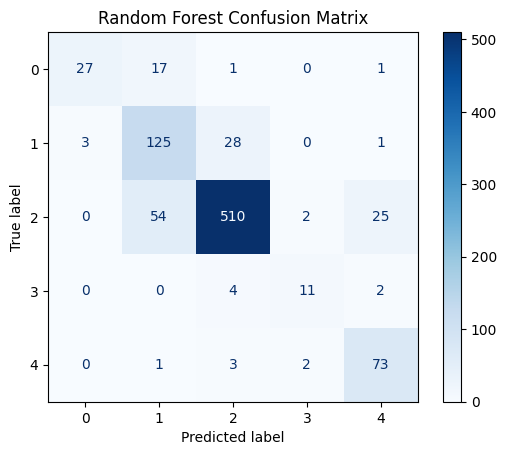

In [53]:

import matplotlib.pyplot as plt
randomForest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10)

RFaccuracy = []
RFf1 = []

for i in range(5):
    randomForest.fit(X_train, y_train)
    train_pred = randomForest.predict(X_train)
    val_pred = randomForest.predict(X_val)
    test_pred = randomForest.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    test_acc = accuracy_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred, average='weighted')

    print(f"Iteration {i+1}: Train Acc = {train_acc:.4f}, Validation Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

    RFaccuracy.append(test_acc)
    RFf1.append(f1)

accuracy = np.mean(RFaccuracy)
f1 = np.mean(RFf1)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


knn

Iteration 1: Train Acc = 0.8895, Validation Acc = 0.8327, Test Acc = 0.8506
Iteration 2: Train Acc = 0.8901, Validation Acc = 0.8436, Test Acc = 0.8371
Iteration 3: Train Acc = 0.8916, Validation Acc = 0.8267, Test Acc = 0.8494
Iteration 4: Train Acc = 0.8940, Validation Acc = 0.8315, Test Acc = 0.8416
Iteration 5: Train Acc = 0.8868, Validation Acc = 0.8303, Test Acc = 0.8449
Test Accuracy: 0.8447
F1 Score: 0.8390


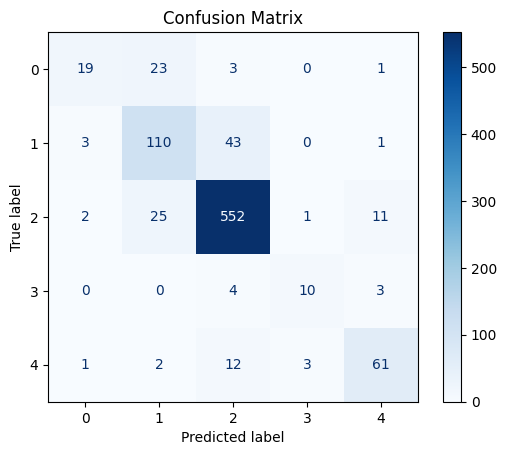

In [54]:

KNNaccuracy = []
KNNf1 = []

for i in range(5):
    X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

    knn = KNeighborsClassifier()
    knn.fit(X_t, y_t)

    train_pred = knn.predict(X_t)
    val_pred = knn.predict(X_val)
    test_pred = knn.predict(X_test)

    train_acc = accuracy_score(y_t, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    test_acc = accuracy_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred, average='weighted')

    print(f"Iteration {i+1}: Train Acc = {train_acc:.4f}, Validation Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

    KNNaccuracy.append(test_acc)
    KNNf1.append(f1)

avg_acc = np.mean(KNNaccuracy)
avg_f1 = np.mean(KNNf1)

print(f"Test Accuracy: {avg_acc:.4f}")
print(f"F1 Score: {avg_f1:.4f}")

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Iteration 1: Train Acc = 0.9314, Validation Acc = 0.8917, Test Acc = 0.9090
Iteration 2: Train Acc = 0.9365, Validation Acc = 0.8977, Test Acc = 0.9011
Iteration 3: Train Acc = 0.9383, Validation Acc = 0.9013, Test Acc = 0.9101
Iteration 4: Train Acc = 0.9344, Validation Acc = 0.8941, Test Acc = 0.9112
Iteration 5: Train Acc = 0.9344, Validation Acc = 0.8905, Test Acc = 0.9045

Test Accuracy: 0.9072
F1 Score: 0.9050


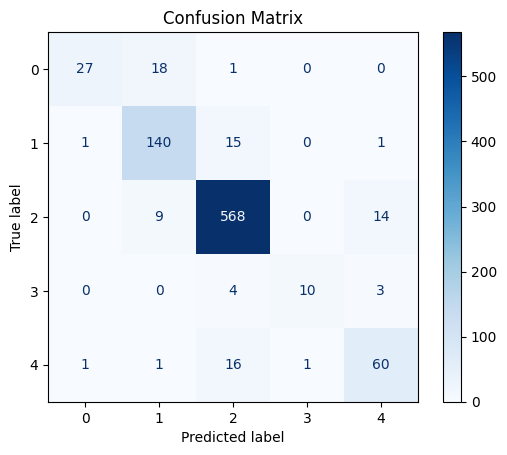

In [55]:

SVMaccuracy = []
SVMf1 = []

for i in range(5):
    X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

    svm = SVC()
    svm.fit(X_t, y_t)

    train_pred = svm.predict(X_t)
    val_pred = svm.predict(X_val)
    test_pred = svm.predict(X_test)

    train_acc = accuracy_score(y_t, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    test_acc = accuracy_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred, average='weighted')

    print(f"Iteration {i+1}: Train Acc = {train_acc:.4f}, Validation Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

    SVMaccuracy.append(test_acc)
    SVMf1.append(f1)

avg_acc = np.mean(SVMaccuracy)
avg_f1 = np.mean(SVMf1)

print(f"\nTest Accuracy: {avg_acc:.4f}")
print(f"F1 Score: {avg_f1:.4f}")

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Iteration 1: Train Acc = 0.9717, Validation Acc = 0.9146, Test Acc = 0.9303
Iteration 2: Train Acc = 0.9792, Validation Acc = 0.9314, Test Acc = 0.9337
Iteration 3: Train Acc = 0.9756, Validation Acc = 0.9350, Test Acc = 0.9438
Iteration 4: Train Acc = 0.9777, Validation Acc = 0.9326, Test Acc = 0.9348
Iteration 5: Train Acc = 0.9729, Validation Acc = 0.9218, Test Acc = 0.9337

Test Accuracy: 0.9353
F1 Score: 0.9348


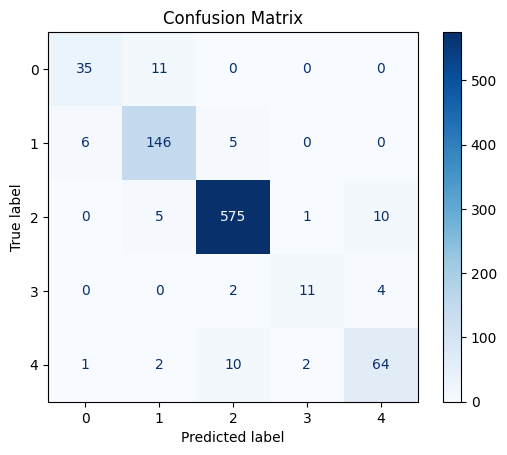

In [56]:
MLPaccuracy = []
MLPf1 = []

for i in range(5):
    X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

    mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, alpha = 0.1)
    mlp.fit(X_t, y_t)

    train_pred = mlp.predict(X_t)
    val_pred = mlp.predict(X_val)
    test_pred = mlp.predict(X_test)

    train_acc = accuracy_score(y_t, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    test_acc = accuracy_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred, average='weighted')

    print(f"Iteration {i+1}: Train Acc = {train_acc:.4f}, Validation Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

    MLPaccuracy.append(test_acc)
    MLPf1.append(f1)

avg_acc = np.mean(MLPaccuracy)
avg_f1 = np.mean(MLPf1)

print(f"\nTest Accuracy: {avg_acc:.4f}")
print(f"F1 Score: {avg_f1:.4f}")

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Iteration 1: Train Acc = 0.8961, Validation Acc = 0.7726, Test Acc = 0.7978
Iteration 2: Train Acc = 0.9037, Validation Acc = 0.7641, Test Acc = 0.7876
Iteration 3: Train Acc = 0.9235, Validation Acc = 0.7954, Test Acc = 0.8202
Iteration 4: Train Acc = 0.9266, Validation Acc = 0.7810, Test Acc = 0.8056
Iteration 5: Train Acc = 0.9109, Validation Acc = 0.8026, Test Acc = 0.8135

test Accuracy: 0.8049
f1 Score: 0.8121


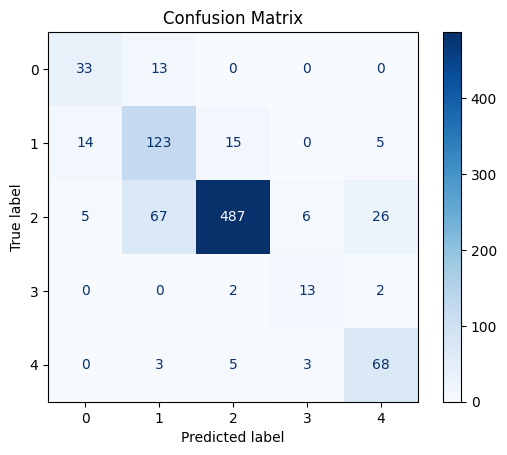

In [57]:
DTaccuracy = []
DTf1 = []

for i in range(5):
    X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

    decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)
    decision_tree.fit(X_t, y_t)

    train_pred = decision_tree.predict(X_t)
    val_pred = decision_tree.predict(X_val)
    test_pred = decision_tree.predict(X_test)

    train_acc = accuracy_score(y_t, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    test_acc = accuracy_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred, average='weighted')

    print(f"Iteration {i+1}: Train Acc = {train_acc:.4f}, Validation Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

    DTaccuracy.append(test_acc)
    DTf1.append(f1)

avg_acc = np.mean(DTaccuracy)
avg_f1 = np.mean(DTf1)

print(f"\ntest Accuracy: {avg_acc:.4f}")
print(f"f1 Score: {avg_f1:.4f}")

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()